# Connect to Google Drive

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read data from UK-Abs and IN-Abs

In [ ]:
data_folder_path = "/content/drive/MyDrive/W266 Final Project/data/"

In [ ]:
def read_txt_from_folder(folder_path):
  txt_list = []
  for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if os.path.isfile(file_path) and file_name.endswith('.txt'):  # Check if the file is a text file
        with open(file_path, 'r') as file:
            contents = file.read()
            txt_list.append((file_name, contents))
  return txt_list

In [ ]:
import os

# train data
UK_train_judgement = read_txt_from_folder(data_folder_path + "UK-Abs/train-data/judgement")
UK_train_summary   = read_txt_from_folder(data_folder_path + "UK-Abs/train-data/summary")
IN_train_judgement = read_txt_from_folder(data_folder_path + "IN-Abs/train-data/judgement")
IN_train_summary   = read_txt_from_folder(data_folder_path + "IN-Abs/train-data/summary")
# test data
UK_test_judgement = read_txt_from_folder(data_folder_path + "UK-Abs/test-data/judgement")
UK_test_summary   = read_txt_from_folder(data_folder_path + "UK-Abs/test-data/summary/full")
IN_test_judgement = read_txt_from_folder(data_folder_path + "IN-Abs/test-data/judgement")
IN_test_summary   = read_txt_from_folder(data_folder_path + "IN-Abs/test-data/summary")

In [ ]:
print(f"UK train judgement: {len(UK_train_judgement)}")
print(UK_train_judgement[:1])
print("\n")
print(f"UK train summary: {len(UK_train_summary)}")
print(UK_train_summary[:1])
print("\n")
print(f"IN train judgement: {len(IN_train_judgement)}")
print(IN_train_judgement[:1])
print("\n")
print(f"IN train summary: {len(IN_train_summary)}")
print(IN_train_summary[:1])
print("\n")
print(f"UK test judgement: {len(UK_test_judgement)}")
print(UK_test_judgement[:1])
print("\n")
print(f"UK test summary: {len(UK_test_summary)}")
print(UK_test_summary[:1])
print("\n")
print(f"IN test judgement: {len(IN_test_judgement)}")
print(IN_test_judgement[:1])
print("\n")
print(f"IN test summary: {len(IN_test_summary)}")
print(IN_test_summary[:1])

UK train judgement: 693
[('uksc-2009-0034.txt', "Part III of the Matrimonial and Family Proceedings Act 1984 was enacted to give the English court the power to grant financial relief after a marriage had been dissolved (or annulled) in a foreign country.\nThis appeal raises for the first time at this appellate level the proper approach to the operation of Part III of the 1984 Act.\nMr and Mrs Agbaje (the husband and the wife) were married for 38 years prior to their divorce in 2005 on the husbands petition in Nigeria.\nThey were born in Nigeria, but both have British and Nigerian citizenship.\nAll five children of the family were born in England.\nThe wife has been living in England continuously since 1999, when the marriage broke down.\nThe assets are about 700,000, of which 530,000 represents two houses in London in the husbands name, and the balance represents properties in Nigeria.\nThe Nigerian court awarded the wife a life interest in a property in Lagos (which, as found by the N

# Join Judgement and Summary

In [ ]:
import pandas as pd

# Convert into Pandas DataFrame
UK_train_judgement_df = pd.DataFrame(UK_train_judgement, columns=['index', 'judgement'])
UK_train_summary_df = pd.DataFrame(UK_train_summary, columns=['index', 'summary'])
IN_train_judgement_df = pd.DataFrame(IN_train_judgement, columns=['index', 'judgement'])
IN_train_summary_df = pd.DataFrame(IN_train_summary, columns=['index', 'summary'])
UK_test_judgement_df = pd.DataFrame(UK_test_judgement, columns=['index', 'judgement'])
UK_test_summary_df = pd.DataFrame(UK_test_summary, columns=['index', 'summary'])
IN_test_judgement_df = pd.DataFrame(IN_test_judgement, columns=['index', 'judgement'])
IN_test_summary_df = pd.DataFrame(IN_test_summary, columns=['index', 'summary'])

UK_train_df = pd.merge(UK_train_judgement_df, UK_train_summary_df, on='index', how='inner')
IN_train_df = pd.merge(IN_train_judgement_df, IN_train_summary_df, on='index', how='inner')
UK_test_df = pd.merge(UK_test_judgement_df, UK_test_summary_df, on='index', how='inner')
IN_test_df = pd.merge(IN_test_judgement_df, IN_test_summary_df, on='index', how='inner')

print(UK_train_df.shape)
print(IN_train_df.shape)
print(UK_test_df.shape)
print(IN_test_df.shape)

(693, 3)
(7030, 3)
(100, 3)
(100, 3)


# Merge UK and IN data

In [ ]:
# Add country information just in case
UK_train_df['country'] = 'UK'
IN_train_df['country'] = 'IN'
UK_test_df['country'] = 'UK'
IN_test_df['country'] = 'IN'

train_df = pd.concat([UK_train_df, IN_train_df])
test_df = pd.concat([UK_test_df, IN_test_df])

print(f"train data: {train_df.shape}")
print(train_df.head(1))
print("\n")
print(f"test data: {test_df.shape}")
print(test_df.head(1))

train data: (7723, 4)
                index                                          judgement  \
0  uksc-2009-0034.txt  Part III of the Matrimonial and Family Proceed...   

                                             summary country  
0  Mr and Mrs Agbaje were married for 38 years.\n...      UK  


test data: (200, 4)
                index                                          judgement  \
0  uksc-2009-0022.txt  This appeal was heard by this Panel on 10 and ...   

                                             summary country  
0  The issue in this appeal is whether a failure ...      UK  


# read in Train and Test data directly from csv

In [ ]:
# Read in CSV data
import pandas as pd
train_df = pd.read_csv("/content/drive/MyDrive/W266 Final Project/data/train_data.csv")
train_df_filter = train_df[['judgement','summary']]
test_df = pd.read_csv("/content/drive/MyDrive/W266 Final Project/data/test_data.csv")
test_df_filter = test_df[['judgement','summary']]

In [ ]:
word_counts = train_df_filter['summary'].apply(lambda x: len(str(x).split()))

average_word_count = word_counts.mean()
p25 = word_counts.quantile(0.25)
p50 = word_counts.median()
p90 = word_counts.quantile(0.90)
p95 = word_counts.quantile(0.95)
max_word_count = word_counts.max()

print(f"Average word count in summary: {average_word_count}")
print(f"25th percentile (p25) word count in summary: {p25}")
print(f"Median (p50) word count in summary: {p50}")
print(f"90th percentile (p90) word count in summary: {p90}")
print(f"95th percentile (p95) word count in summary: {p95}")
print(f"Maximum word count in summary: {max_word_count}")

Average word count in summary: 862.8754370063447
25th percentile (p25) word count in summary: 441.0
Median (p50) word count in summary: 681.0
90th percentile (p90) word count in summary: 1470.8000000000002
95th percentile (p95) word count in summary: 1948.3999999999978
Maximum word count in summary: 27768


In [ ]:
word_counts = train_df_filter['judgement'].apply(lambda x: len(str(x).split()))

average_word_count = word_counts.mean()
p25 = word_counts.quantile(0.25)
p50 = word_counts.median()
p90 = word_counts.quantile(0.90)
p95 = word_counts.quantile(0.95)
max_word_count = word_counts.max()

print(f"Average word count in judgement: {average_word_count}")
print(f"25th percentile (p25) word count in judgement: {p25}")
print(f"Median (p50) word count in judgement: {p50}")
print(f"90th percentile (p90) word count in judgement: {p90}")
print(f"95th percentile (p95) word count in judgement: {p95}")
print(f"Maximum word count in judgement: {max_word_count}")

Average word count in judgement: 5275.510034960507
25th percentile (p25) word count in judgement: 2114.0
Median (p50) word count in judgement: 3380.0
90th percentile (p90) word count in judgement: 10408.000000000002
95th percentile (p95) word count in judgement: 16092.299999999994
Maximum word count in judgement: 139645


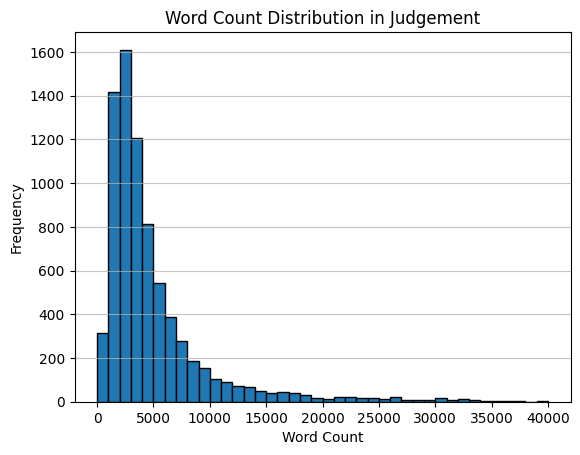

In [ ]:
import matplotlib.pyplot as plt

# Assuming word_counts is already calculated as above
word_counts = train_df_filter['judgement'].apply(lambda x: len(str(x).split()))

plt.hist(word_counts, bins=40, edgecolor='black', range=[0, 40000])
plt.title('Word Count Distribution in Judgement')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

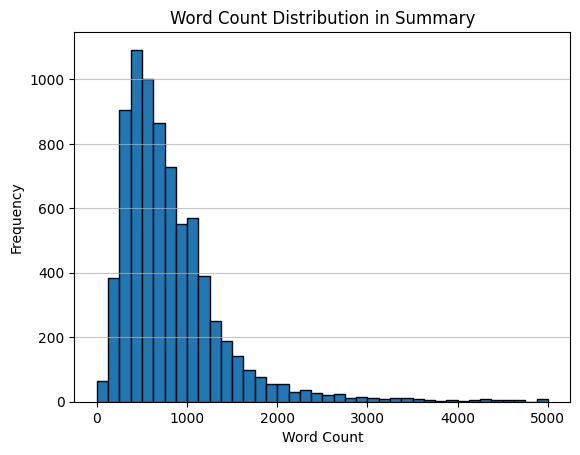

In [ ]:
import matplotlib.pyplot as plt

# Assuming word_counts is already calculated as above
word_counts = train_df_filter['summary'].apply(lambda x: len(str(x).split()))

plt.hist(word_counts, bins=40, edgecolor='black', range=[0, 5000])
plt.title('Word Count Distribution in Summary')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
average_word_count = train_df_filter['summary'].apply(lambda x: len(str(x).split())).mean()
print(f"Average word count in summary: {average_word_count}")

Average word count in summary: 862.8754370063447


In [ ]:
for summary in list(train_df_filter['summary']):
  print(len(summary))

['Mr and Mrs Agbaje were married for 38 years.\nBoth Nigerian by birth, they had met in England in the 1960s and acquired UK citizenship in 1972.\nAll five of their children were born (and all but one educated) in England, and in 1975 Mr Agbaje bought a property in England called Lytton Road in which their children stayed with a nanny.\nBut for the majority of their married life Mr and Mrs Agbaje lived in Nigeria.\nThey separated in 1999, at which point Mrs Agbaje came to live in Lytton Road.\nShe has lived here ever since.\nIn 2003 Mr Agbaje issued divorce proceedings in the Nigerian courts in which Mrs Agbaje sought ancillary relief.\nThe Nigerian court awarded her a life interest in a property in Lagos (with a capital value of about 86,000) and a lump sum equivalent to about 21,000.\nPart III of the Matrimonial and Family Proceedings Act 1984 was enacted to give the English court the power to grant financial relief after a marriage has been dissolved (or annulled) in a foreign count

In [ ]:
total_word_count = 0

for summary in list(train_df_filter['summary']):
  word_count = len(summary.split())
  total_word_count += word_count

print(total_word_count)
print(len(train_df_filter))
print(total_word_count / len(train_df_filter))


AttributeError: ignored

# Gensim

In [ ]:
!pip install gensim

In [ ]:
from gensim.summarization import summarize

text = train_df_filter['judgement'][0]
# Summarize the long article and get the most important sentences
summary = summarize(text, ratio=0.1)  # You can adjust the ratio parameter to control the length of the summary
print(summary)


ModuleNotFoundError: ignored

# sumy

In [ ]:
!pip install sumy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 83.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21696 sha256=3f3645449b2effae62b63106072cd0714dfee3236758a11c4c39191bff907925
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13707 sha256=8307fc7046b950f6150d77a1e538bce79bf2ee2dcbf65c9b93cd4a8b9ced0295
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=1068

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

# Initialize the summarizer with the TextRank algorithm
summarizer = LsaSummarizer()

baseline_output = []

for judgement in train_df_filter['judgement'][:5]:
  parser = PlaintextParser.from_string(judgement, Tokenizer("english"))

  # Summarize the article and get the most important sentences
  summary = summarizer(parser.document, 100)  # You can change the number of sentences as needed
  summary_sentences = [str(sentence) for sentence in summary]
  baseline_output.append(summary_sentences)

len(baseline_output)

5

# T5 baseline and Evaluation

In [ ]:
!pip install -q sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.8 MB/s eta 0:00:00


In [1]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.6 MB/s eta 0:00:00


In [ ]:
!pip install -q evaluate
import evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 15.8 MB/s eta 0:00:00


In [ ]:
!pip install -q rouge_score

  Preparing metadata (setup.py) ... done


In [ ]:
#let's make longer output readable without horizontal scrolling
from pprint import pprint

In [2]:
from transformers import AutoTokenizer, LongT5ForConditionalGeneration

model = (
    LongT5ForConditionalGeneration.from_pretrained("Stancld/longt5-tglobal-large-16384-pubmed-3k_steps")
)
tokenizer = AutoTokenizer.from_pretrained("Stancld/longt5-tglobal-large-16384-pubmed-3k_steps")

In [5]:
print(model)

LongT5ForConditionalGeneration(
  (shared): Embedding(32100, 1024)
  (encoder): LongT5Stack(
    (embed_tokens): Embedding(32100, 1024)
    (block): ModuleList(
      (0): LongT5Block(
        (layer): ModuleList(
          (0): LongT5LayerTransientGlobalSelfAttention(
            (TransientGlobalSelfAttention): LongT5TransientGlobalAttention(
              (q): Linear(in_features=1024, out_features=1024, bias=False)
              (k): Linear(in_features=1024, out_features=1024, bias=False)
              (v): Linear(in_features=1024, out_features=1024, bias=False)
              (o): Linear(in_features=1024, out_features=1024, bias=False)
              (relative_attention_bias): Embedding(32, 16)
              (global_relative_attention_bias): Embedding(32, 16)
              (global_input_layer_norm): LongT5LayerNorm()
            )
            (layer_norm): LongT5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): LongT5LayerFF(
            (Dens

In [6]:
# Get the number of parameters
num_params = sum(p.numel() for p in model.parameters())
print("Number of parameters:", num_params)

# Get the number of layers
num_layers = model.config.num_hidden_layers
print("Number of layers:", num_layers)

Number of parameters: 783117824
Number of layers: 24


In [ ]:
from transformers import AutoTokenizer, LongT5ForConditionalGeneration

model = (
    LongT5ForConditionalGeneration.from_pretrained("Stancld/longt5-tglobal-large-16384-pubmed-3k_steps")
    .to("cuda")
    .half()
)
tokenizer = AutoTokenizer.from_pretrained("Stancld/longt5-tglobal-large-16384-pubmed-3k_steps")


In [ ]:

# Function to generate summaries for a given DataFrame
def generate_summaries(data_frame, model, tokenizer):
    generated_summaries = []
    for judgment_text in data_frame['judgement']:
        # Tokenize the input text
        input_ids = tokenizer.encode(judgment_text, return_tensors="pt", max_length=4096, truncation=True)

        # Generate summary using the model
        summary_ids = model.generate(input_ids.to("cuda"), num_beams=2, max_length=512, early_stopping=True)

        # Decode the generated summary IDs back to text
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)
        generated_summaries.append(summary)

    return generated_summaries

# Generate summaries for train_df_filter
generated_summaries = generate_summaries(train_df_filter.iloc[0], model, tokenizer)

# Add the generated summaries to the DataFrame
train_df_filter['generated_summary'] = generated_summaries


KeyboardInterrupt: ignored

In [ ]:
from transformers import DistilBertConfig, DistilBertModel

# Initializing a DistilBERT configuration
configuration = DistilBertConfig()

# Initializing a model (with random weights) from the configuration
model = DistilBertModel(configuration)

# Accessing the model configuration
configuration = model.config

In [ ]:
from transformers import AutoTokenizer, DistilBertModel
import torch

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
tokenizer = AutoTokenizer.from_pretrained("t5-small")
model = AutoModelForSeq2SeqLM.from_pretrained("t5-small")

In [ ]:
ARTICLE_TO_SUMMARIZE = "summarize: " + train_df_filter["judgement"][0]
inputs = tokenizer([ARTICLE_TO_SUMMARIZE], return_tensors="pt")
# Generate Summary
summary_ids = model.generate(inputs["input_ids"], max_length=100)
print(tokenizer.decode(summary_ids[0], skip_special_tokens=True, clean_up_tokenization_spaces=False))

Token indices sequence length is longer than the specified maximum sequence length for this model (12905 > 512). Running this sequence through the model will result in indexing errors


a judge has ruled that the court should have the power to make an order . the judge has ruled that the court should have the power to make an order . the judge has ruled that the court should have the power to make an order . the judge has ruled that the court should have the power to make an order .


In [ ]:
text = train_df_filter["judgement"][0]

windows = [text[i:i+512] for i in range(0, len(text), 512)]

# Generate summaries for each window
window_summaries = []
for window in windows:
    input_text = f"summarize: {window}"
    input_encoding = tokenizer.encode_plus(
        input_text,
        padding='longest',
        truncation=True,
        max_length=512,
        return_tensors="tf"
    )
    input_ids = input_encoding["input_ids"]
    attention_mask = input_encoding["attention_mask"]

    outputs = model.generate(
        inputs["input_ids"], max_length=80
    )

    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    window_summaries.append(summary)

# Concatenate the window summaries into a single summary
full_summary = " ".join(window_summaries)
print(full_summary)

KeyboardInterrupt: ignored